# Descrição do Negócio

## House Rocket Company

A **House Rocket** é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Você como um Data Scientist deve ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio. Ele percebe que a empresa possui dificuldades em definir os preços de forma eficaz e justa, o que leva vendas não muito lucrativas, o que pode acontecer pos causa de duas situações:

    - Imóveis comprados a preços muito altos, onde imóveis com as mesmas características poderiam ser adquiridos por preços menores
    - Imóveis comprados com características pouco atrativas, as quais dificultam a lucratividade da venda, pois conseguem 
    pouca margem na operação

## Problema de negócio

O objetivo projeto é fazer uma **Análise Exploratória de Dados (EDA)**, com o objetivo de obter **insights** sobre os dados disponíveis, e com isso **responder perguntas** como:

    - **Quais** imóveis o CEO da empresa deve comprar, e por qual **preço**?
    - Após comprados, qual será o melhor **momento** para vendê-los, e a qual preço?
    - Uma reforma **agregaria valor** aos imóveis? Qual tipo de reforma? Qual o incremendo no valor do imóvel com cada reforma?

# Obtendo os Dados

In [1]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

Na célula acima instalamos as bibliotecas necessárias para realizarmos diversos procedimentos em nosso projeto.

In [2]:
## Importing the data

df = pd.read_csv('C:/Users/felip//anaconda3/envs/HouseRoketProject/archive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Description of the features

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Análise do DataSet

Já podemos ter uma idéia inicial do nosso DataSet. Para um projeto de Data Science, não é um DataSet muito grande (21613 linhas e 21 colunas).

Quase todas features são numericas, exceto da coluna 'date', que está no formato de TEXTO, e deve ser transformada para o tipo DATA.

Nosso DataSet também não possui nenhum valor nulo.

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Análise Estatística Preliminar

In [8]:
pd.options.display.float_format = '{:.2f}'.format ## supress scientific notation on pandas function

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft

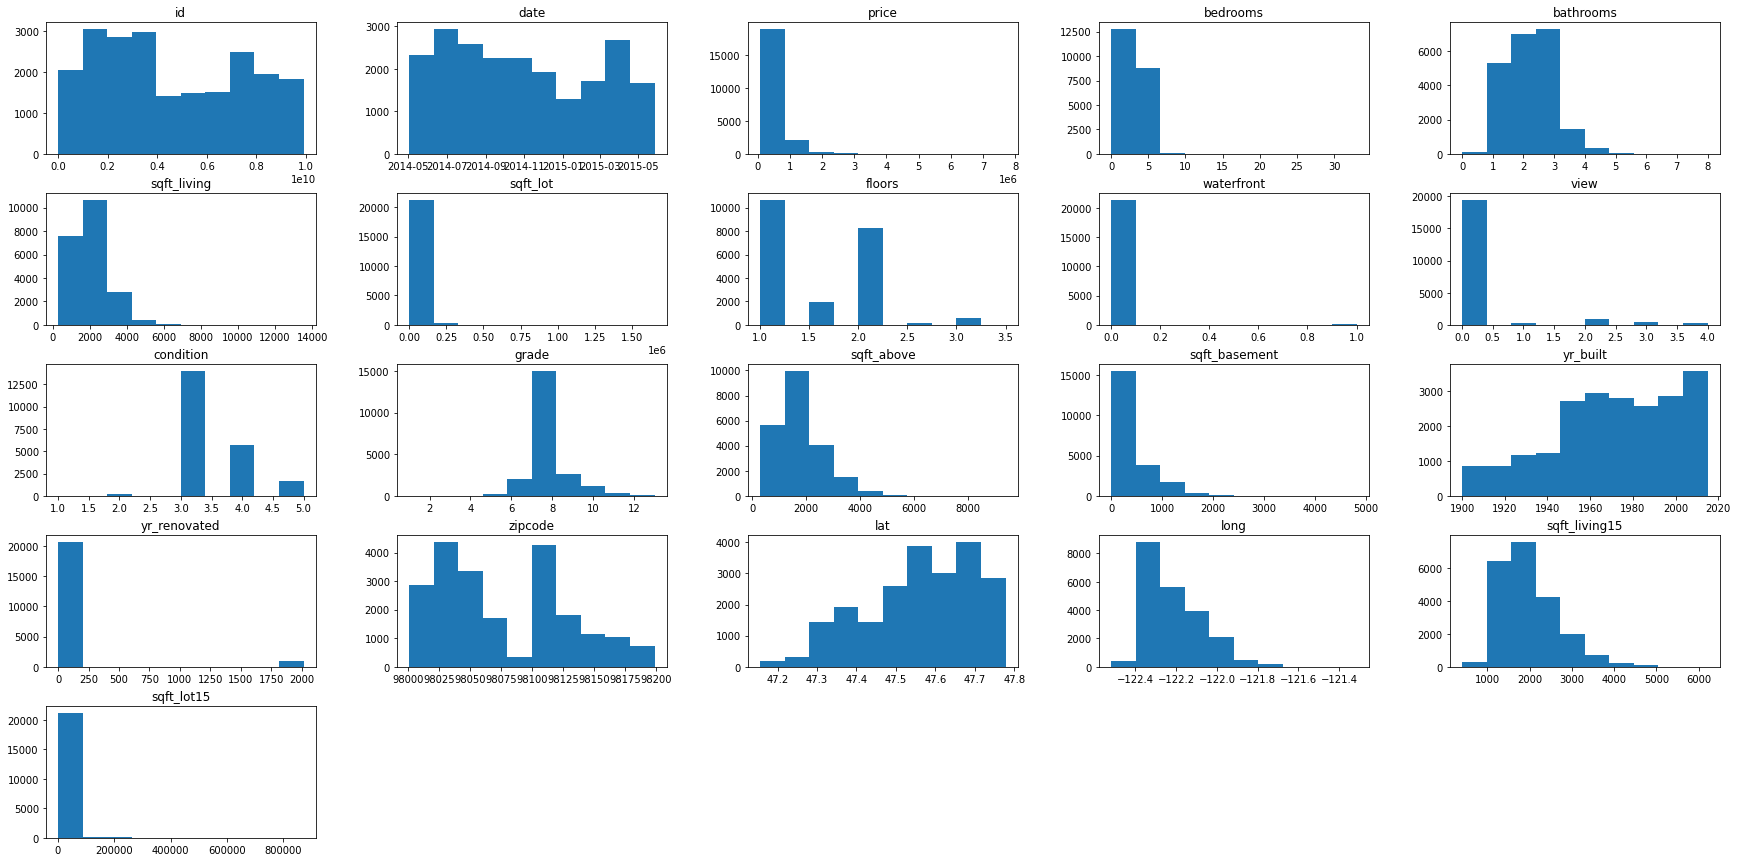

In [9]:
df.hist(figsize = (30 , 15) , bins = 10 , grid = False)

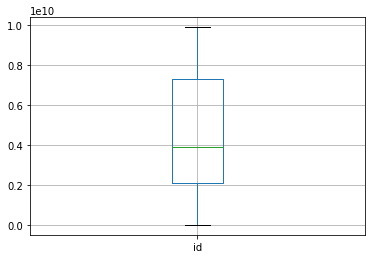

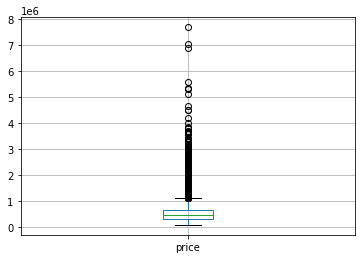

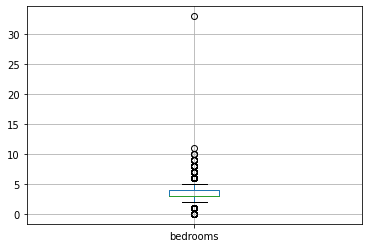

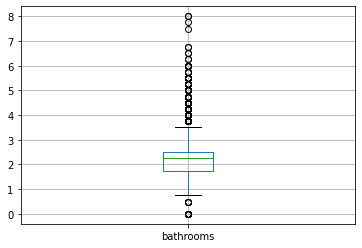

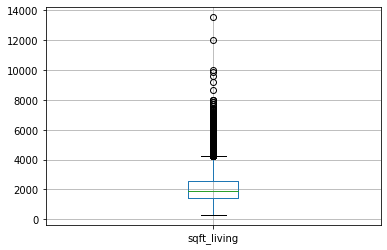

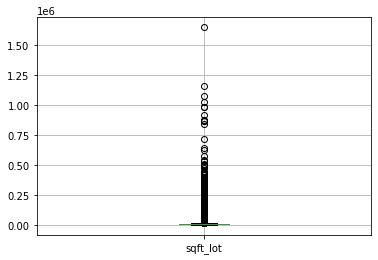

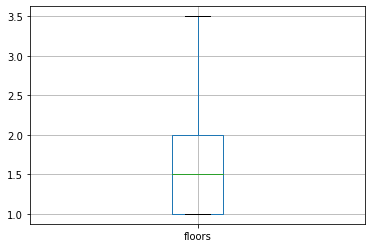

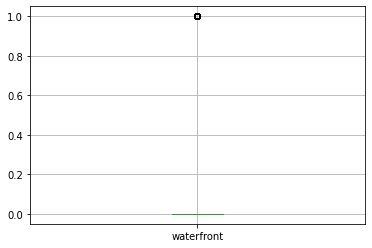

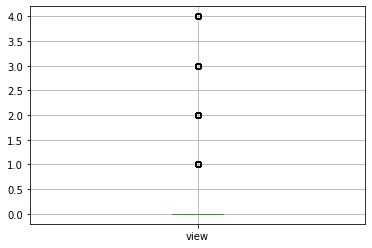

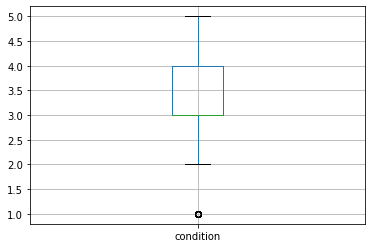

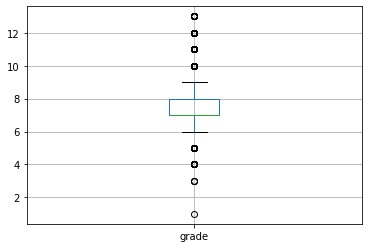

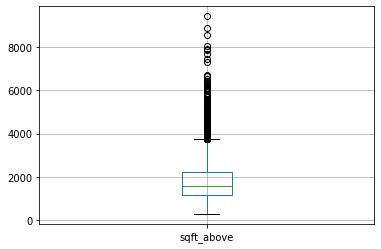

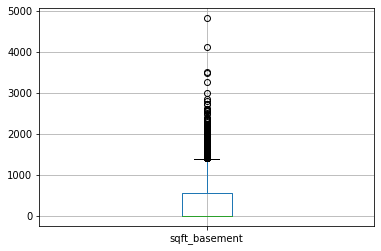

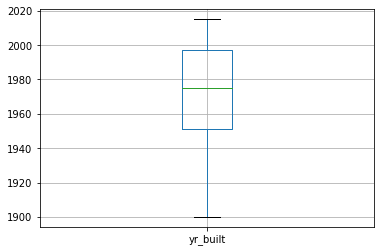

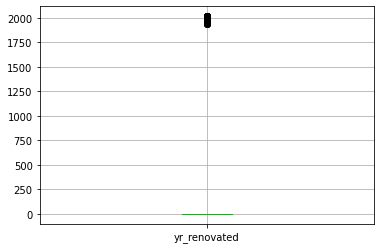

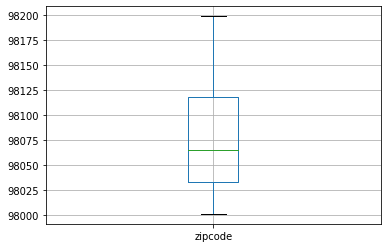

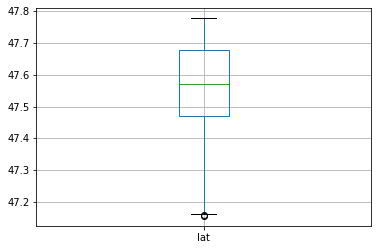

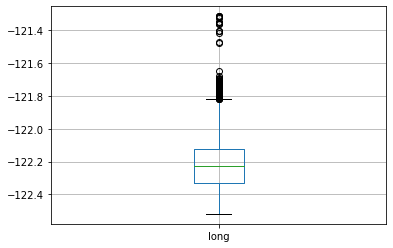

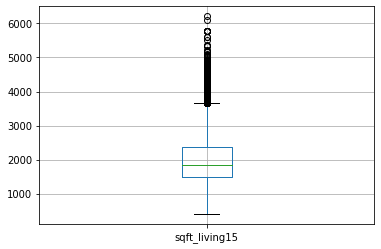

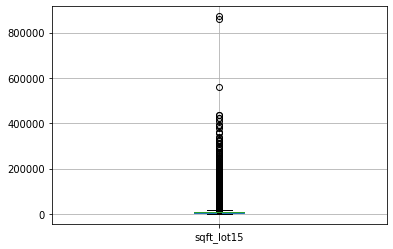

In [3]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
    plt.figure()
    df.boxplot(column)

<AxesSubplot:>

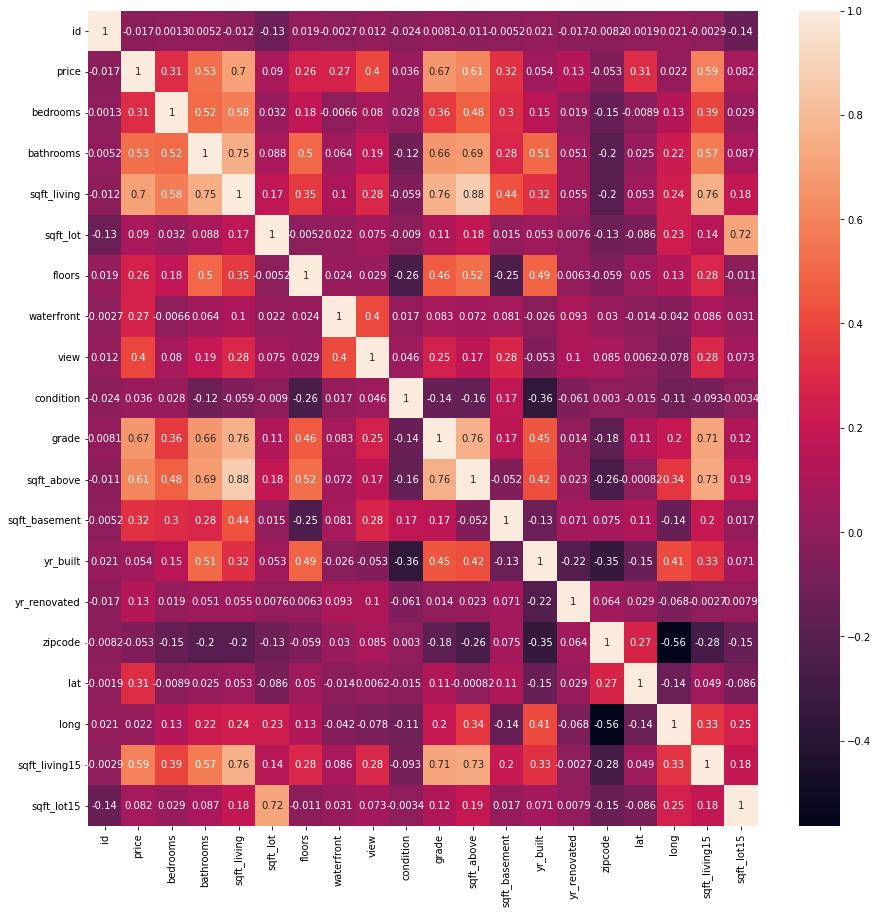

In [4]:
plt.figure(figsize =(15,15))
cor = df.corr()
sns.heatmap(cor,annot =True)

## Análise estatística preliminar das features

Em uma análise preliminar, percebemos várias features com outliers, porém, por enquanto não iremos tratá-los, pois como estamos falando de imóveis, podem haver sim alguns com características destoantes dos demais. Por exemplo, em 'price', podem haver casas muito mais caras que outras.
Outra questão, são features numericas que representam características qualitativas, as quais iremos utilizar no processo de **feature engeneering**, e também transformá-las em variáveis **dummy**, se formos aplicar algum algoritmo de **Machine Learning**.

# Feature Engeneering

## Regras que aplicaremos para criar novas features:

- view (0 a 4) - Quão boa é vista do imóvel -> 0 = Terrible , 1 = Bad , 2 = Reasonable , 3 = Good , 4 = Amazing
- condition (1 a 5) - Quão boas estão as condições do imóvel -> 1 = Terrible , 2 = Bad , 3 = Reasonable , 4 = Good , 5 = Amazing
- grade (1 a 13) - Nota construção + design -> 1-3 = Terrible , 4-6 = Bad , 7 = Reasonable , 8-10 = Good , 11-13 = Amazing
- yr_built (1900 a 2020) - Ano de construção -> 1900-1950 = Old , 1950-2000 = Reasonable , 2000-2020 = New
- yr_renovated - Ano da última reforma -> Se > 2000 , foi reformado recentemente.
- Adicionaremos uma coluna indicando o mês da venda da casa, para identificarmos na EDA o mês com média mais alta de vendas.

In [6]:
df1 = df.copy()

In [7]:
for i in range( 0 , len(df1)):
    if(df1.loc[i , 'view'] == 0):
        df1.loc[i , 'How is the view?'] = 'Terrible'
        
    elif(df1.loc[i , 'view'] == 1):
        df1.loc[i , 'How is the view?'] = 'Bad'
        
    elif(df1.loc[i , 'view'] == 2):
        df1.loc[i , 'How is the view?'] = 'Reasonable'
        
    elif(df1.loc[i , 'view'] == 3):
        df1.loc[i , 'How is the view?'] = 'Good'
        
    else:
        df1.loc[i , 'How is the view?'] = 'Amazing'

In [8]:
for i in range( 0 , len(df1)):
    if(df1.loc[i , 'condition'] == 1):
        df1.loc[i , 'How is the condition?'] = 'Terrible'
        
    elif(df1.loc[i , 'condition'] == 2):
        df1.loc[i , 'How is the condition?'] = 'Bad'
        
    elif(df1.loc[i , 'condition'] == 3):
        df1.loc[i , 'How is the condition?'] = 'Reasonable'
        
    elif(df1.loc[i , 'condition'] == 4):
        df1.loc[i , 'How is the condition?'] = 'Good'
        
    else:
        df1.loc[i , 'How is the condition?'] = 'Amazing'

In [9]:
for i in range( 0 , len(df1)):
    if(df1.loc[i , 'grade'] >= 1) & (df1.loc[i , 'grade'] <= 3):
        df1.loc[i , 'What is the grade?'] = 'Terrible'
        
    elif(df1.loc[i , 'grade'] >= 4) & (df1.loc[i , 'grade'] <= 6):
        df1.loc[i , 'What is the grade?'] = 'Bad'
        
    elif(df1.loc[i , 'grade'] == 7):
        df1.loc[i , 'What is the grade?'] = 'Reasonable'
        
    elif(df1.loc[i , 'grade'] >= 8) & (df1.loc[i , 'grade'] <= 10):
        df1.loc[i , 'What is the grade?'] = 'Good'
        
    else:
        df1.loc[i , 'What is the grade?'] = 'Amazing'

In [10]:
for i in range( 0 , len(df1)):
    if(df1.loc[i , 'yr_built'] >= 1900) & (df1.loc[i , 'yr_built'] <= 1949):
        df1.loc[i , 'Age of the house?'] = 'Old'
        
    elif(df1.loc[i , 'yr_built'] >= 1950) & (df1.loc[i , 'yr_built'] <= 2000):
        df1.loc[i , 'Age of the house?'] = 'Reasonable'
        
    else:
        df1.loc[i , 'Age of the house?'] = 'New'

In [11]:
for i in range( 0 , len(df1)):
    if(df1.loc[i , 'yr_renovated'] > 2000):
        df1.loc[i , 'Renovated recently?'] = 'Yes'
        
    else:
        df1.loc[i , 'Renovated recently?'] = 'No'

In [23]:
df1['month_sold'] = pd.to_datetime(df1['date']).dt.month

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,How is the view?,How is the condition?,What is the grade?,Age of the house?,Renovated recently?,month_sold
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,47.51,-122.26,1340,5650,Terrible,Reasonable,Reasonable,Reasonable,No,10
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,47.72,-122.32,1690,7639,Terrible,Reasonable,Reasonable,Reasonable,No,12
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,47.74,-122.23,2720,8062,Terrible,Reasonable,Bad,Old,No,2
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,47.52,-122.39,1360,5000,Terrible,Amazing,Reasonable,Reasonable,No,12
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,47.62,-122.05,1800,7503,Terrible,Reasonable,Good,Reasonable,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,47.70,-122.35,1530,1509,Terrible,Reasonable,Good,New,No,5
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,47.51,-122.36,1830,7200,Terrible,Reasonable,Good,New,No,2
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,47.59,-122.30,1020,2007,Terrible,Reasonable,Reasonable,New,No,6
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,47.53,-122.07,1410,1287,Terrible,Reasonable,Good,New,No,1


In [ ]:
df1.head()

In [ ]:
df1.columns

# EDA

### Revisitando o dataset

In [24]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,How is the view?,How is the condition?,What is the grade?,Age of the house?,Renovated recently?,month_sold
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,47.51,-122.26,1340,5650,Terrible,Reasonable,Reasonable,Reasonable,No,10
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,47.72,-122.32,1690,7639,Terrible,Reasonable,Reasonable,Reasonable,No,12
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,47.74,-122.23,2720,8062,Terrible,Reasonable,Bad,Old,No,2
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,47.52,-122.39,1360,5000,Terrible,Amazing,Reasonable,Reasonable,No,12
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,47.62,-122.05,1800,7503,Terrible,Reasonable,Good,Reasonable,No,2


In [25]:
df1.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'How is the view?',
       'How is the condition?', 'What is the grade?', 'Age of the house?',
       'Renovated recently?', 'month_sold'],
      dtype='object')

### Criar Hipóteses para validarmos na EDA

- Precisam ser criada **antes** da exploração dos dados
- Precisam ser **afirmações**
- Precisam ter **métricas e comparações**
- Precisam ser **validadas** pelos Especialistas de Negócio

## **H1** Imóveis com vista para o mar são mais caros.

<BarContainer object of 2 artists>

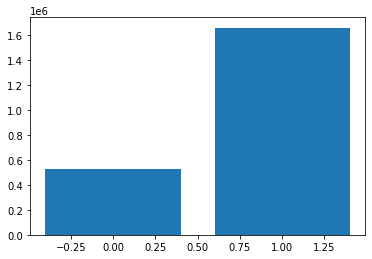

In [50]:
byWaterfront = df1[['waterfront' , 'price']].groupby('waterfront').mean().reset_index()


plt.bar(byWaterfront['waterfront'] , byWaterfront['price'])

**Verdadeiro** Imóveis com vista para o mar possuem uma média de venda muito mais alta do que os demais.

## **H2** Quanto maior a sala de estar, mais caro o imóvel.

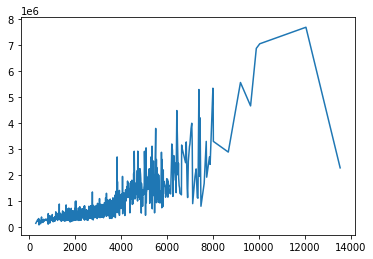

In [62]:
byLivingSqft = df1[['sqft_living' , 'price']].groupby('sqft_living').mean().reset_index()


plt.plot(byLivingSqft['sqft_living'] , byLivingSqft['price'])
plt.show()

**Verdadeiro** Imóveis com maiores áreas na sala de estar são mais caros, principalmente a partir de 10.000m².

## **H3** Imóveis com mais andares são mais caros.

<BarContainer object of 6 artists>

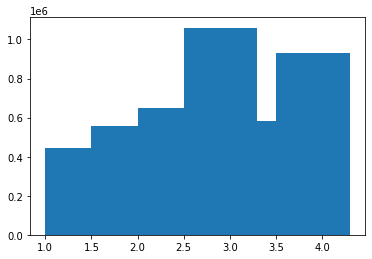

In [67]:
byFloors = df1[['floors' , 'price']].groupby('floors').mean().reset_index()


plt.bar(byFloors['floors'] , byFloors['price'] , align = 'edge')

In [ ]:
byLivingSqft = df1[['sqft_living' , 'price']].groupby('sqft_living').mean().reset_index()


plt.plot(byLivingSqft['sqft_living'] , byLivingSqft['price'])
plt.show()

**Verdadeiro** Imóveis com maior números de andares são mais caros, com pico em 3 andares.

## **H4** Imóveis mais antigos são mais baratos.

<BarContainer object of 3 artists>

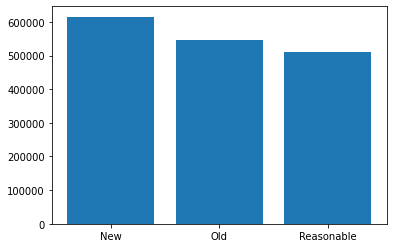

In [66]:
byAge = df1[['Age of the house?' , 'price']].groupby('Age of the house?').mean().reset_index()

plt.bar(byAge['Age of the house?'] , byAge['price'])

**Falso** Imóveis mais antigos não são secessariamente mais baratos. Podemos ver no detalhamento que imóveis construídos nas décadas de 1910 e 1930 possuem uma média de preço bem expressiva.

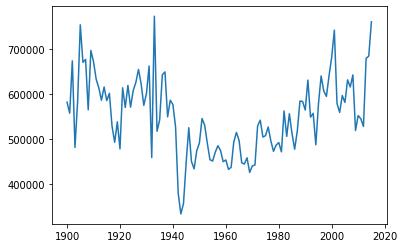

In [68]:
byYrBuilt = df1[['yr_built' , 'price']].groupby('yr_built').mean().reset_index()


plt.plot(byYrBuilt['yr_built'] , byYrBuilt['price'])
plt.show()

## **H5** Reformas não agregam mais que 10% no valor do imóvel.

<BarContainer object of 2 artists>

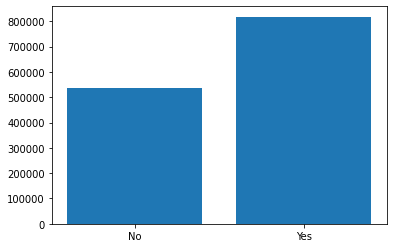

In [28]:
byRenovation = df1[['Renovated recently?' , 'price']].groupby('Renovated recently?').mean().reset_index()

plt.bar(byRenovation['Renovated recently?'] , byRenovation['price'])

**Falso** Reformas em imóveis reformados possuem valores 50% mais altos em média.

## **H6** A época do ano que os imóveis valorizam mais é no verão.

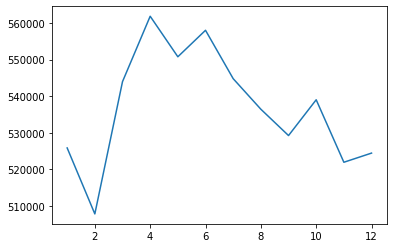

In [29]:
byMonthSold = df1[['month_sold' , 'price']].groupby('month_sold').mean().reset_index()


plt.plot(byMonthSold['month_sold'] , byMonthSold['price'])
plt.show()

**Falso** A média de vendas tem seu pico no Outono, entre os meses 3(março) e 6(junho).

## **H7** Quanto mais banheiros, mais caro é o imóvel.

<BarContainer object of 30 artists>

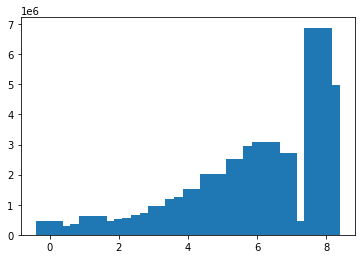

In [30]:
byBathroom = df1[['bathrooms' , 'price']].groupby('bathrooms').mean().reset_index()

plt.bar(byBathroom['bathrooms'] , byBathroom['price'])

**Verdadeiro** Quanto maior o número de banheiros, maior a média de venda dos imóveis.

## **H8** Quanto mais quartos, mais caro é o imóvel.

<BarContainer object of 13 artists>

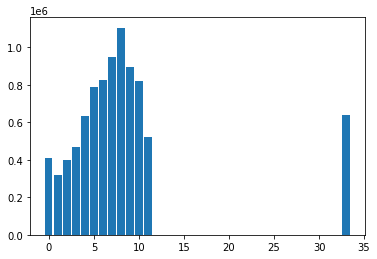

In [31]:
byBedrooms = df1[['bedrooms' , 'price']].groupby('bedrooms').mean().reset_index()

plt.bar(byBedrooms['bedrooms'] , byBedrooms['price'])

**Falso** Imóveis com quantidade de quartos entre 5 e 10 possuem uma média mais alta de preço. O pico de preço fica nos imóveis com 8 quartos. Imóveis com 33 quartos possuem uma média alta de preço, porém podem ser um erro nos dados.

## **H9** Imóveis com um design mais arrojado são mais caros.

<BarContainer object of 5 artists>

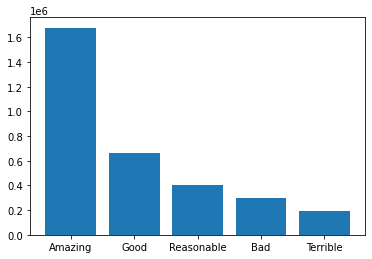

In [35]:
byDesign = df1[['What is the grade?' , 'price']].groupby('What is the grade?').mean().reset_index().sort_values('price' , ascending=False)

plt.bar(byDesign['What is the grade?'] , byDesign['price'])

**Verdadeiro** Quanto mais arrojado o imóvel, mais caro ele é.

## **H10** As condições do imóvel não influenciam no valor do imóvel.

<BarContainer object of 5 artists>

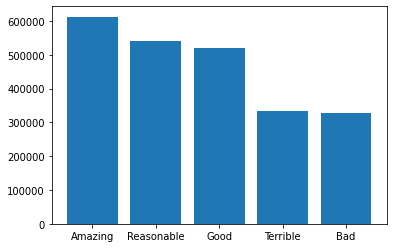

In [37]:
byCondition = df1[['How is the condition?' , 'price']].groupby('How is the condition?').mean().reset_index().sort_values('price' , ascending=False)

plt.bar(byCondition['How is the condition?'] , byCondition['price'])

<BarContainer object of 5 artists>

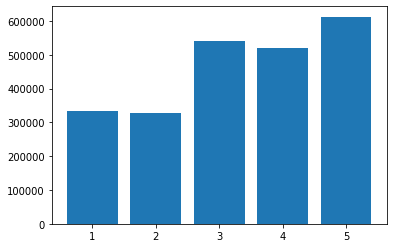

In [38]:
byConditionRate = df1[['condition' , 'price']].groupby('condition').mean().reset_index().sort_values('price' , ascending=False)

plt.bar(byConditionRate['condition'] , byConditionRate['price'])

**Falso** As condições do imóvel influenciam no seu valor, e quanto melhores, mais caro o imóvel.

## **H11** Caracteríticas geográficas dos imóveis mais caros.

In [44]:
fig = px.scatter_mapbox( df1 , lat = 'lat' ,
                        lon = 'long' ,
                        color = 'grade' ,
                        size = 'price' ,
                        color_continuous_scale = px.colors.cyclical.IceFire ,
                        size_max = 40 ,
                        zoom = 10)

fig.update_layout( mapbox_style = 'open-street-map')
fig.update_layout( height = 600 , margin = {'r': 0 , 't': 0 , 'l': 0 , 'b': 0})
fig.show()

Percbemos que os imóveis mais caros e mais bem avaliados ficam concentrados nas regiões da costa leste do Lago Washington, e na costa oeste do Lago Sammamish. ou seja, nas áres costeiras.